In [1]:
import os
import sys
import numpy as np
import pandas as pd
sys.path.insert(0, os.path.abspath('..'))

from autocnet.matcher.outlier_detector import SpatialSuppression

from IPython.display import display

%pylab inline

Populating the interactive namespace from numpy and matplotlib


(14, 14)


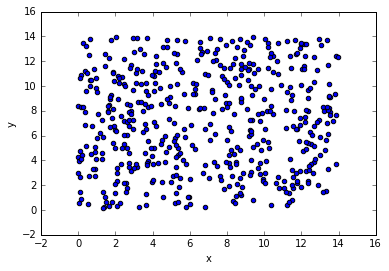

In [47]:
r = np.random.RandomState(12345)
df = pd.DataFrame(r.uniform(0,14,(500, 3)), columns=['x', 'y', 'strength'])
minimum = SpatialSuppression(df, (14,14), k = 5)

print(minimum.domain)
minimum.suppress()
df.plot(kind = 'scatter', x = 'x', y = 'y')

/scratch/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


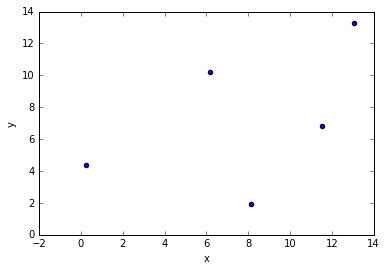

In [48]:
df[minimum.mask].plot(kind = 'scatter', x = 'x', y = 'y')

In [65]:
r = np.random.RandomState(12345)
df = pd.DataFrame(r.uniform(0,13,(500, 3)), columns=['x', 'y', 'strength'])
minimum = SpatialSuppression(df, (13,13), k = 5)

print(minimum.domain)
minimum.suppress()
df.plot(kind = 'scatter', x = 'x', y = 'y')

(13, 13)


OverflowError: cannot convert float infinity to integer

/scratch/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


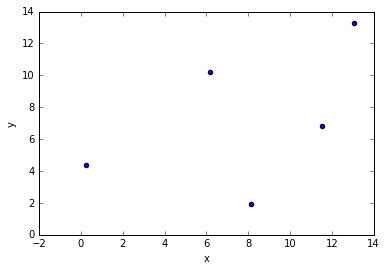

In [56]:
df[minimum.mask].plot(kind = 'scatter', x = 'x', y = 'y')

In [61]:
search_space = np.linspace(2, 13/16, 250)
cell_sizes = (search_space / math.sqrt(2)).astype(np.int)
min_idx = 0
max_idx = len(search_space) - 1
mid_idx = int((min_idx + max_idx) / 2)
cell_size = cell_sizes[mid_idx]
r = search_space[mid_idx]
cell_size1 = cell_sizes[r]
n_x_cells = int(13 / cell_size1)
n_y_cells = int(13 / cell_size1)
x = 0/1

# print(search_space)
# print(mid_idx)
# print(cell_size)
print(r)
print(cell_size1)
# print(n_x_cells)
# print(n_y_cells)

1.40863453815
1


/scratch/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
